In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import pandas_datareader as data

In [2]:
start='2010-01-01'
end='2019-12-31'
df=yf.download('AAPL',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412873,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443574,447610800


In [3]:
x=input("")
df=yf.download(x,start,end)
df.head()

MSFT
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623892,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631531,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486507,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242250,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402552,51197400


In [4]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,30.620001,31.100000,30.590000,30.950001,23.623892,38409100
1,2010-01-05,30.850000,31.100000,30.639999,30.959999,23.631531,49749600
2,2010-01-06,30.879999,31.080000,30.520000,30.770000,23.486507,58182400
3,2010-01-07,30.629999,30.700001,30.190001,30.450001,23.242250,50559700
4,2010-01-08,30.280001,30.879999,30.240000,30.660000,23.402552,51197400


In [5]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400


In [6]:
import matplotlib.pyplot as plt


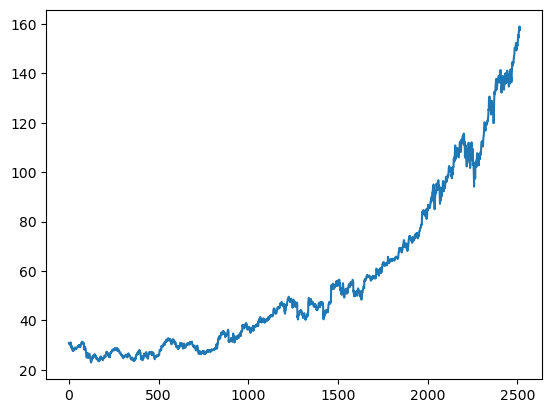

In [7]:
plt.plot(df.Close)

In [8]:
df

,Open,High,Low,Close,Volume
0,30.620001,31.100000,30.590000,30.950001,38409100
1,30.850000,31.100000,30.639999,30.959999,49749600
2,30.879999,31.080000,30.520000,30.770000,58182400
3,30.629999,30.700001,30.190001,30.450001,50559700
4,30.280001,30.879999,30.240000,30.660000,51197400
...,...,...,...,...,...
2510,158.119995,158.119995,157.270004,157.410004,17718200
2511,157.479996,157.710007,157.119995,157.380005,8989200
2512,157.559998,158.729996,157.399994,158.669998,14520600
2513,159.449997,159.550003,158.220001,158.960007,18412800


In [9]:
ma100=df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2510    142.3618
2511    142.5666
2512    142.8312
2513    143.0739
2514    143.2970
Name: Close, Length: 2515, dtype: float64

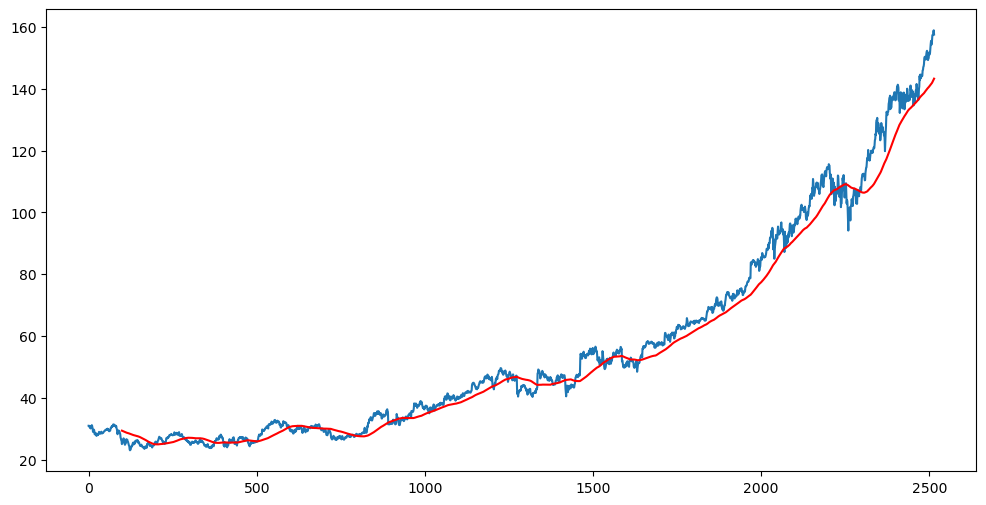

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [11]:
ma200=df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2510    135.23265
2511    135.45145
2512    135.67230
2513    135.89415
2514    136.10255
Name: Close, Length: 2515, dtype: float64

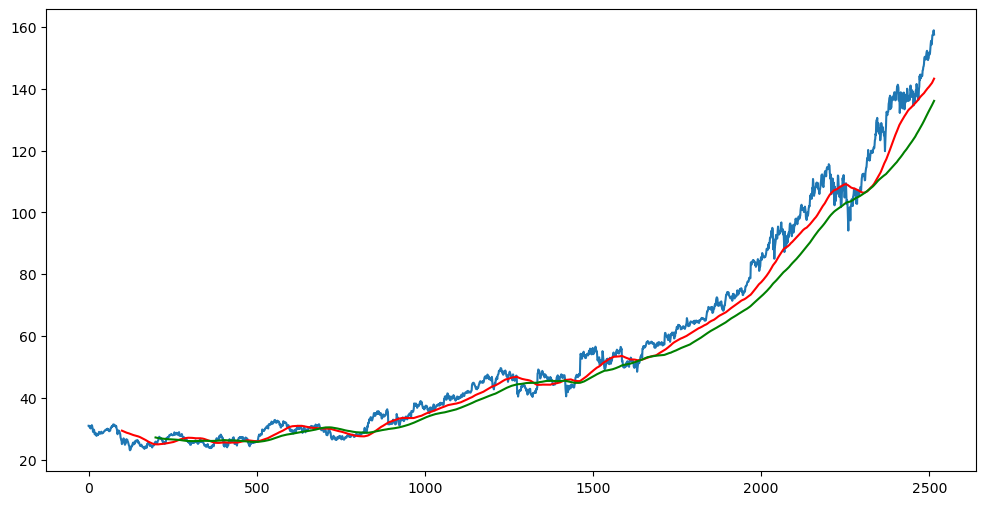

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [13]:
df.shape

(2515, 5)

In [14]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(1760, 1)
(755, 1)


In [15]:
data_training.head()

,Close
0,30.950001
1,30.959999
2,30.770000
3,30.450001
4,30.660000


In [16]:
data_testing.head()

,Close
1760,62.900002
1761,62.139999
1762,62.580002
1763,62.299999
1764,62.299999


In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler=MinMaxScaler(feature_range=(0,1))

In [19]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.19551836],
       [0.19576457],
       [0.19108595],
       ...,
       [0.99064277],
       [0.99162767],
       [0.98448665]])

In [20]:
data_training_array.shape

(1760, 1)

In [21]:
x_train=[]
y_train=[]
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [22]:
x_train.shape

(1660, 100, 1)

In [24]:
from tensorflow.keras.layers import Dense, Dropout, LSTM


In [25]:
from tensorflow.keras.models import Sequential

In [99]:
model1=Sequential()
model1.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=60, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model1.add(Dropout(0.3))
model1.add(LSTM(units=80, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model1.add(Dropout(0.4))
model1.add(LSTM(units=120, activation='relu', input_shape=(x_train.shape[1],1)))
model1.add(Dropout(0.5))

In [100]:
model1.add(Dense(units=1))


In [101]:
model1.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_9 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_10 (Dropout)        (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_11 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [102]:
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.fit_transform(x_train,y_train,epochs=50)

Epoch 1/50
52/52 [==============================] - 7s 87ms/step - loss: 0.0432
Epoch 2/50
52/52 [==============================] - 5s 90ms/step - loss: 0.0080
Epoch 3/50
52/52 [==============================] - 5s 89ms/step - loss: 0.0075
Epoch 4/50
52/52 [==============================] - 5s 88ms/step - loss: 0.0073
Epoch 5/50
52/52 [==============================] - 5s 89ms/step - loss: 0.0069
Epoch 6/50
52/52 [==============================] - 5s 88ms/step - loss: 0.0072
Epoch 7/50
52/52 [==============================] - 5s 88ms/step - loss: 0.0058
Epoch 8/50
52/52 [==============================] - 5s 90ms/step - loss: 0.0060
Epoch 9/50
52/52 [==============================] - 5s 90ms/step - loss: 0.0057
Epoch 10/50
52/52 [==============================] - 5s 88ms/step - loss: 0.0060
Epoch 11/50
52/52 [==============================] - 5s 87ms/step - loss: 0.0055
Epoch 12/50
52/52 [==============================] - 5s 87ms/step - loss: 0.0050
Epoch 13/50
52/52 [==================

In [103]:
model1.save('keras_model.h5')

In [104]:
data_testing.head()

,Close
1760,62.900002
1761,62.139999
1762,62.580002
1763,62.299999
1764,62.299999


In [105]:
data_training.tail(100)

,Close
1660,58.060001
1661,58.200001
1662,58.020000
1663,58.299999
1664,57.939999
...,...
1755,63.540001
1756,63.549999
1757,63.240002
1758,63.279999


In [106]:
past_100_days=data_training.tail(100)

In [107]:
final_df=past_100_days.append(data_testing, ignore_index=True)

/tmp/ipykernel_5174/351597942.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing, ignore_index=True)


In [108]:
final_df.head()

,Close
0,58.060001
1,58.200001
2,58.020000
3,58.299999
4,57.939999


In [109]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.80048871e-02],
       [1.93674115e-02],
       [1.76155838e-02],
       [2.03406326e-02],
       [1.68369773e-02],
       [1.85888049e-02],
       [1.19707976e-02],
       [1.31387074e-02],
       [1.35279736e-02],
       [1.37226252e-02],
       [1.42092358e-02],
       [1.63503667e-02],
       [1.69343216e-02],
       [1.90754155e-02],
       [1.77128911e-02],
       [1.83941533e-02],
       [1.63503667e-02],
       [1.21654492e-02],
       [1.34306663e-02],
       [1.42092358e-02],
       [1.36253180e-02],
       [1.41119285e-02],
       [1.18734903e-02],
       [0.00000000e+00],
       [8.17518336e-03],
       [3.11435203e-03],
       [4.86610544e-04],
       [9.53770773e-03],
       [1.01216627e-02],
       [7.00731063e-03],
       [5.83943790e-03],
       [1.50851496e-02],
       [1.56691045e-02],
       [1.18734903e-02],
       [6.71535173e-03],
       [1.69343216e-02],
       [1.77128911e-02],
       [1.15815314e-02],
       [1.35279736e-02],
       [1.17761459e-02],


In [110]:
input_data.shape

(855, 1)

In [111]:
x_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [112]:
x_test,y_test=np.array(x_test),np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(755, 100, 1)
(755,)


In [113]:
y_predicted=model1.predict(x_test)

24/24 [==============================] - 1s 31ms/step


In [114]:
y_predicted.shape

(755, 1)

In [115]:
y_test

array([0.06510951, 0.05771289, 0.06199516, 0.05927007, 0.05927007,
       0.06452555, 0.06257907, 0.06238442, 0.06793186, 0.06228711,
       0.06316303, 0.06150851, 0.06121655, 0.05927007, 0.06355233,
       0.06569343, 0.07114356, 0.07270074, 0.07844279, 0.09313868,
       0.08681263, 0.08214114, 0.07172752, 0.06773721, 0.07270074,
       0.07231143, 0.07026765, 0.06939173, 0.07639901, 0.07581509,
       0.0828224 , 0.08136253, 0.08097323, 0.08087588, 0.08184918,
       0.08058392, 0.07931874, 0.08184918, 0.08184918, 0.07805356,
       0.07562044, 0.08496353, 0.07591243, 0.07824818, 0.07844279,
       0.07970805, 0.0854501 , 0.08291974, 0.08486619, 0.08272505,
       0.07980539, 0.08311436, 0.08204379, 0.08428227, 0.08486619,
       0.07785887, 0.08583941, 0.08428227, 0.08535283, 0.08652067,
       0.08836984, 0.09012167, 0.09245741, 0.09391728, 0.09090028,
       0.0926521 , 0.09099755, 0.0926521 , 0.09216546, 0.09070559,
       0.09021901, 0.08778592, 0.0850608 , 0.09021901, 0.08934

In [116]:
y_predicted

array([[0.13857178],
       [0.13898526],
       [0.13900104],
       [0.13865346],
       [0.13800237],
       [0.13713554],
       [0.13619946],
       [0.13530709],
       [0.13453515],
       [0.13397688],
       [0.13363379],
       [0.13348135],
       [0.13346782],
       [0.13353753],
       [0.13362746],
       [0.13372704],
       [0.13385615],
       [0.13408436],
       [0.13447367],
       [0.1351093 ],
       [0.13619357],
       [0.13774016],
       [0.13959362],
       [0.14142746],
       [0.14291355],
       [0.14389732],
       [0.14433852],
       [0.14426251],
       [0.1437423 ],
       [0.14297284],
       [0.14213839],
       [0.14146566],
       [0.14108673],
       [0.14104518],
       [0.141311  ],
       [0.14182597],
       [0.14249524],
       [0.14320622],
       [0.1438959 ],
       [0.14452171],
       [0.14500833],
       [0.14527556],
       [0.14540441],
       [0.14537571],
       [0.14520663],
       [0.14493436],
       [0.1446174 ],
       [0.144

In [117]:
scaler.scale_

array([0.00973236])

In [118]:
scale_factor=1/0.00973236

In [119]:
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

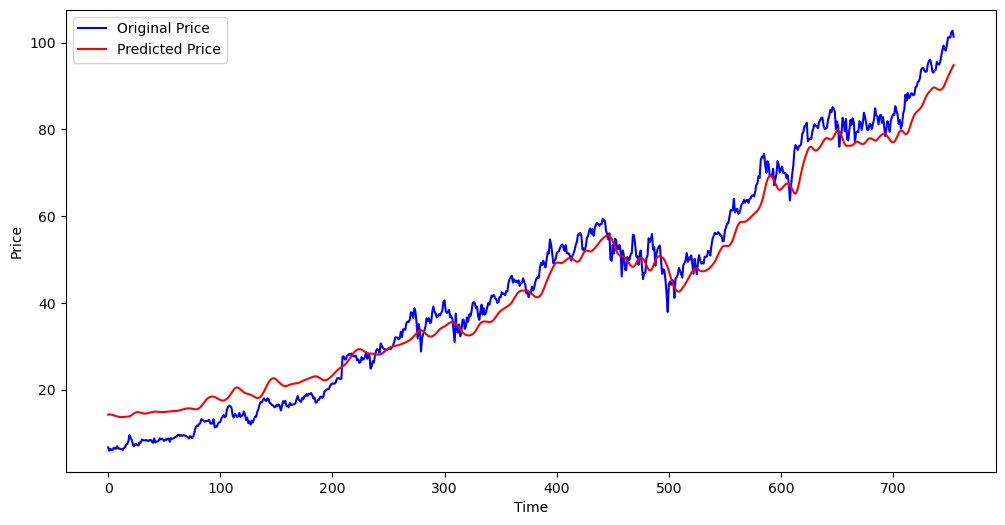

In [120]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()